In [1]:
import os

os.chdir("../../..")
os.environ["CUDA_VISIBLE_DEVICES"] = "6"

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
import numpy as np
from modular_splicing.dataset.datafile_object import SpliceAIDatafile
from modular_splicing.knockdown.cassette_exons import locate_cassette_exon

from modular_splicing.knockdown.pipeline import dataset_for_cell_line
from modular_splicing.knockdown.experimental_setting import experimental_settings

from modular_splicing.utils.plots.plot_psam import render_psams

In [4]:
datafile = SpliceAIDatafile.load()

In [5]:
dset = dataset_for_cell_line(cell_line="HepG2")

In [6]:
table = dset.loc["TRA2A"]

In [7]:
windows = {"3'": [], "5'": []}
cl = 10
for _, row in table["SE"][:1000].iterrows():
    res = locate_cassette_exon(
        datafile, row, experimental_setting=experimental_settings["SE"]
    )
    if res is None:
        continue
    x, feat = res
    for k in feat:
        xw = x[feat[k] - cl : feat[k] + cl + 1]
        if xw.shape[0] != cl * 2 + 1:
            continue
        windows[k[0]].append(xw)
windows = {k: np.array(windows[k]) for k in windows}

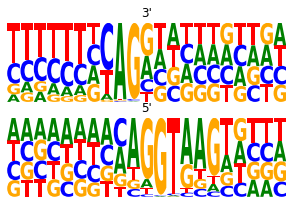

In [8]:
render_psams([windows["3'"].mean(0), windows["5'"].mean(0)], names=["3'", "5'"])